<a href="https://colab.research.google.com/github/igvasilev/study-projects/blob/master/DM%26ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project**: Classification with CART


### **Author**: VASILEV Igor

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV


from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import json

##### In this work we will use toy dataset for classificaion called 'Wine dataset'. Link: https://archive.ics.uci.edu/ml/datasets/wine

**Description**: 

These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines.

**The attributes are**:

1.   Alcohol
2.   Malic acid
3. Ash
4. Alcalinity of ash
5. Magnesium
6. Total phenols
7. Flavanoids
8. Nonflavanoid phenols
9. Proanthocyanins
10. Color intensity
11. Hue
12. OD280/OD315 of diluted wines
13. Proline



## Download data


In [0]:
# download data from sklearn.datasets Python library
data = datasets.load_wine()
dt = data['data']
target = data['target']

In [0]:
dt.shape

(178, 13)

In [0]:
df = pd.DataFrame(data=dt)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [0]:
# Add colums name to our dataset
df.columns = [ 'alcohol'
             	,'malicAcid'
             	,'ash'
            	,'ashalcalinity'
             	,'magnesium'
            	,'totalPhenols'
             	,'flavanoids'
             	,'nonFlavanoidPhenols'
             	,'proanthocyanins'
            	,'colorIntensity'
             	,'hue'
             	,'od280_od315'
             	,'proline'
                ]


In [0]:
# Add target column to our data
df['name'] = pd.DataFrame(target)
df.head(2)

,alcohol,malicAcid,ash,ashalcalinity,magnesium,totalPhenols,flavanoids,nonFlavanoidPhenols,proanthocyanins,colorIntensity,hue,od280_od315,proline,name
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0


In [0]:
# Check data on null values. As we can see, there are no null values in data
df.isnull().sum()

alcohol                0
malicAcid              0
ash                    0
ashalcalinity          0
magnesium              0
totalPhenols           0
flavanoids             0
nonFlavanoidPhenols    0
proanthocyanins        0
colorIntensity         0
hue                    0
od280_od315            0
proline                0
name                   0
dtype: int64

In [0]:
df.describe()

,alcohol,malicAcid,ash,ashalcalinity,magnesium,totalPhenols,flavanoids,nonFlavanoidPhenols,proanthocyanins,colorIntensity,hue,od280_od315,proline,name
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


## Feature selection

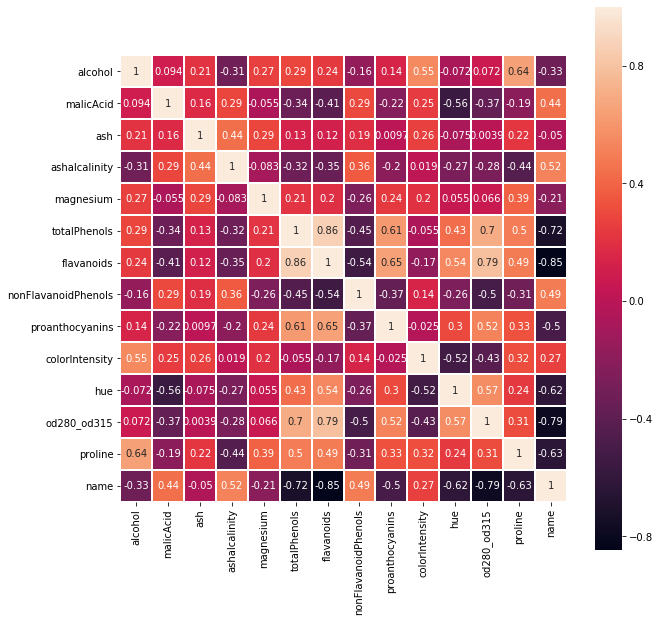

In [0]:
correlations =  df[df.columns].corr()

fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
sns.heatmap(correlations, annot=True, linewidths=1, vmax=1, square=True, ax=ax);

As we can see from the correlations map above, there is -0.05 corr coefficient between our target value and 'ash' column. So, we should drop it.

In [0]:
X= df.drop(['name','ash'], axis=1)
X.head(5)

,alcohol,malicAcid,ashalcalinity,magnesium,totalPhenols,flavanoids,nonFlavanoidPhenols,proanthocyanins,colorIntensity,hue,od280_od315,proline
0,14.23,1.71,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [0]:
Y = df['name'].copy()
Y.head(5)

0    0
1    0
2    0
3    0
4    0
Name: name, dtype: int64

In [0]:
Y.unique()

array([0, 1, 2])

## Splitting data

In [0]:
# We take 70% of samples as train data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

## Classification

In [0]:
# At first, we try to build a simple Desigion Tree without parameters tuning
clf = DecisionTreeClassifier()
clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)

print('accuracy score: ', accuracy_score(Y_test, y_pred))
print()
print(confusion_matrix(Y_test, y_pred))
print()
print('parameters: ', json.dumps(clf.get_params(), indent=4, sort_keys=True ))

accuracy score:  0.9259259259259259

[[17  2  0]
 [ 1 20  0]
 [ 0  1 13]]

parameters:  {
    "ccp_alpha": 0.0,
    "class_weight": null,
    "criterion": "gini",
    "max_depth": null,
    "max_features": null,
    "max_leaf_nodes": null,
    "min_impurity_decrease": 0.0,
    "min_impurity_split": null,
    "min_samples_leaf": 1,
    "min_samples_split": 2,
    "min_weight_fraction_leaf": 0.0,
    "presort": "deprecated",
    "random_state": null,
    "splitter": "best"
}


As we can see, the quality of prediction is already high, but we can improve it by tuning different parameters of the model with pipeline module.

We will tune the following paremeters to control overfitting and for the purpose of trying pruning strategy.


1.   **criterion** : 
    The function to measure the quality of a split. Supported criteria are
    "gini" for the Gini impurity and "entropy" for the information gain.
2.   **splitter** : 
    The strategy used to choose the split at each node. Supported
    strategies are "best" to choose the best split and "random" to choose
    the best random split.
3.  **max_depth** : 
    The maximum depth of the tree. If None, then nodes are expanded until
    all leaves are pure or until all leaves contain less than
    min_samples_split samples.
4.  **min_samples_leaf** : 
    The minimum number of samples required to be at a leaf node.
    A split point at any depth will only be considered if it leaves at
    least ``min_samples_leaf`` training samples in each of the left and
    right branches.  This may have the effect of smoothing the model



In [0]:
# Set parameter grid for DesigionTreeClassifier
param_grid = {
    'clf__criterion' : ['gini', 'entropy' ],
    'clf__splitter' : ['best', 'random'],
    'clf__max_depth' : np.arange(1, 30),
    'clf__min_samples_leaf' :  np.arange(1, 10)
}

In [0]:
# Initialize a pipeline
pipeline = Pipeline([
    ('clf', DecisionTreeClassifier()) #step1 - classifier
])
pipeline.steps

[('clf',
  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                         max_depth=None, max_features=None, max_leaf_nodes=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, min_samples_split=2,
                         min_weight_fraction_leaf=0.0, presort='deprecated',
                         random_state=None, splitter='best'))]

In [0]:
pipeline.set_params(clf=DecisionTreeClassifier())

Pipeline(memory=None,
         steps=[('clf',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features=None, max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        presort='deprecated', random_state=None,
                                        splitter='best'))],
         verbose=False)

In [0]:
# We will search parameters with GridSearchCV module that also performs 
# cross-validation, dividing train data on cv=3 parts.
cv_grid = GridSearchCV(pipeline, param_grid, cv=3)
cv_grid.fit(X_train, Y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('clf',
                                        DecisionTreeClassifier(ccp_alpha=0.0,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features=None,
                                                               max_leaf_nodes=None,
                                                               min_impurity_decrease=0.0,
                                                               min_impurity_split=None,
                                                               min_samples_leaf=1,
                                                               min_samples_split=2,
                                         

In [0]:
# Best parameters for our tree is
cv_grid.best_params_

{'clf__criterion': 'entropy',
 'clf__max_depth': 17,
 'clf__min_samples_leaf': 3,
 'clf__splitter': 'random'}

In [0]:
# With best score (average score on cross-validation)
cv_grid.best_score_

0.967673248161053

In [0]:
y_pred = cv_grid.predict(X_test)
accuracy = accuracy_score(Y_test,y_pred)
print('Accuracy of the best classifier after CV is %.3f%%' % (accuracy*100))

Accuracy of the best classifier after CV is 100.000%


As we can see, accuracy on test set is almost the same as on train data, that tells us about the absence of overfitting.

But still, we couldn`t improve our prediction. Therefore, now we will try o build **Random Forest** - the ensemble method, which is made of tree composition

In [0]:
# We will also try to tune the number of trees in composition
accuracy = []
nums = []
for n in range(1, 21):
  clf = RandomForestClassifier(n_estimators=n)
  clf.fit(X_train, Y_train)
  y_pred = clf.predict(X_test)
  accuracy.append(accuracy_score(Y_test, y_pred))
  nums.append(n)

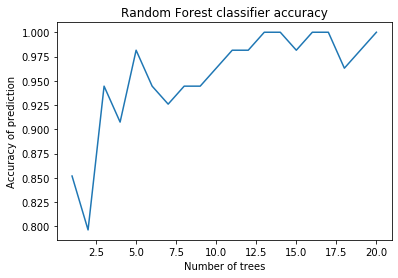

In [0]:
plt.plot(nums, accuracy)
plt.xlabel('Number of trees')
plt.ylabel('Accuracy of prediction')
plt.title('Random Forest classifier accuracy')
plt.show()

We can see that the accuracy of predictions inreases with number of trees in RandomForest model.

## Conclusion

We look on CART model and use it for Wine classification. The parameter tuning may help to improve the results, but the range of these parameters should not vary a lot, because it may lead to overfitting problem. We also try to apply random forest classifier which help us to improve desigion tree classifyer results.